In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
file_path = "../data/sleep_master.csv"
# CSVファイルを再度読み込む
sleep_data = pd.read_csv(file_path)

# データの最初の数行を表示
sleep_data.head()

,dateOfSleep,awakeCount,awakeDuration,awakeningsCount,duration,efficiency,endTime,isMainSleep,logId,minutesAfterWakeup,...,restlessDuration,startTime,timeInBed,totalMinutesAsleep,totalSleepRecords,totalTimeInBed,deepStage,lightStage,remStage,wakeStage
0,2023-05-07,3,6,13,30780000,96,2023-05-07T07:24:30.000,True,41231650660,0,...,16,2023-05-06T22:51:00.000,513,491,1,513,98,223,153,39
1,2023-05-08,0,0,7,30240000,44,2023-05-08T07:44:30.000,True,41241721398,0,...,43,2023-05-07T23:20:30.000,504,222,1,504,58,258,123,65
2,2023-05-09,0,0,11,20760000,36,2023-05-09T05:59:30.000,True,41257353989,0,...,222,2023-05-09T00:13:00.000,346,124,1,346,41,187,86,32
3,2023-05-10,2,3,21,26640000,49,2023-05-10T06:07:00.000,True,41274949495,34,...,239,2023-05-09T22:42:30.000,444,202,1,444,104,194,97,49
4,2023-05-11,0,0,9,25140000,50,2023-05-11T07:31:30.000,True,41286394883,22,...,123,2023-05-11T00:32:00.000,419,199,1,419,72,196,95,56


In [7]:
# Convert the 'dateOfSleep' column to a datetime format
sleep_data['dateOfSleep'] = pd.to_datetime(sleep_data['dateOfSleep'])

# Extract day of week from the 'dateOfSleep' column
sleep_data['dayOfWeek'] = sleep_data['dateOfSleep'].dt.day_name()


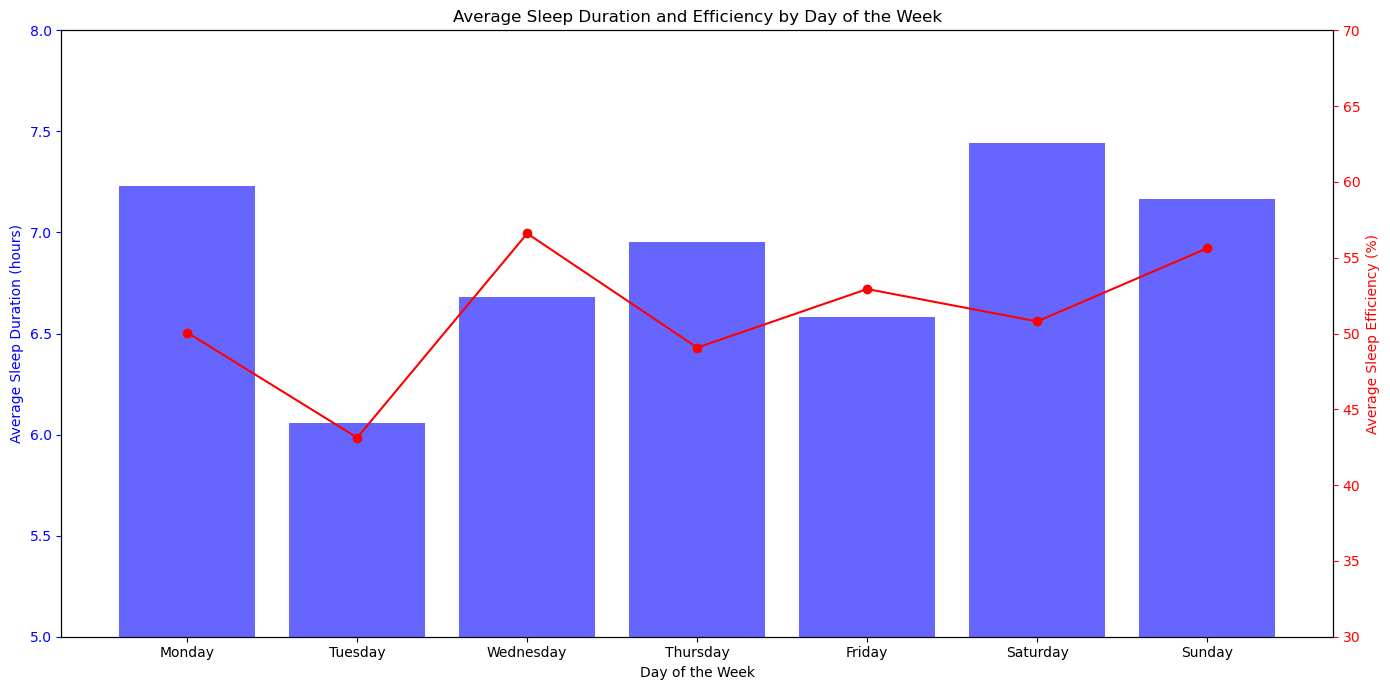

In [5]:
# Set up the figure and axes again in English
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot average sleep duration
ax1.bar(grouped_data['dayOfWeek'], grouped_data['duration'], alpha=0.6, label='Average Sleep Duration (hours)', color='b')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Average Sleep Duration (hours)', color='b')
ax1.tick_params('y', colors='b')
ax1.set_title('Average Sleep Duration and Efficiency by Day of the Week')
ax1.set_ylim(5, 8)

# Plot average sleep efficiency on the second y-axis
ax2 = ax1.twinx()
ax2.plot(grouped_data['dayOfWeek'], grouped_data['efficiency'], color='r', marker='o', label='Average Sleep Efficiency (%)')
ax2.set_ylabel('Average Sleep Efficiency (%)', color='r')
ax2.tick_params('y', colors='r')
ax2.set_ylim(30, 70)

# Show the plot
plt.tight_layout()
plt.show()



In [6]:

# Group by day of week and calculate the average for the selected columns
grouped_data = sleep_data.groupby('dayOfWeek').agg({
    'duration': 'mean',          # Average sleep duration in milliseconds
    'efficiency': 'mean',       # Average sleep efficiency
    'awakeCount': 'mean',       # Average number of times awakened
    'awakeningsCount': 'mean'   # Average number of times awakened (including short awakenings)
}).reset_index()

# Convert average sleep duration from milliseconds to hours
grouped_data['duration'] = grouped_data['duration'] / (60 * 60 * 1000)

# Reorder the days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_data['dayOfWeek'] = pd.Categorical(grouped_data['dayOfWeek'], categories=ordered_days, ordered=True)
grouped_data = grouped_data.sort_values('dayOfWeek')

grouped_data

,dayOfWeek,duration,efficiency,awakeCount,awakeningsCount
1,Monday,7.228889,50.066667,1.266667,13.933333
5,Tuesday,6.057778,43.133333,1.200000,13.600000
6,Wednesday,6.682222,56.600000,1.000000,14.000000
4,Thursday,6.951190,49.071429,1.357143,14.285714
0,Friday,6.582222,52.933333,0.866667,14.066667
2,Saturday,7.443333,50.800000,1.466667,16.400000
3,Sunday,7.164583,55.625000,1.562500,16.062500
